# Unsupervised Analysis of Days of Week

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get data

In [2]:
from jupyterworkflow.data import get_data
data = get_data()

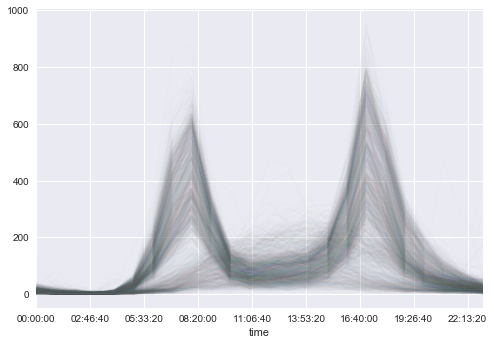

In [3]:
pivoted = data.pivot_table('Total', index= data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

## Pinciple Component Analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(1610, 24)

In [5]:
X2 = PCA(2).fit_transform(X)
X2.shape

(1610, 2)

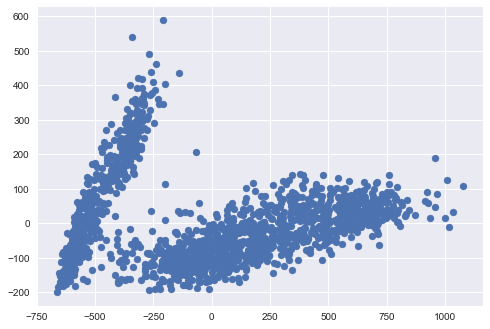

In [6]:
plt.scatter(X2[:, 0], X2[:, 1]);

## Unsuprvised Clustering

In [12]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 1, 0, 0])

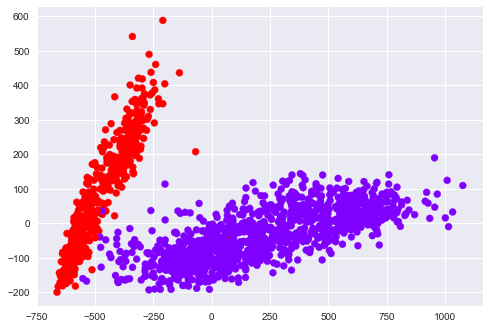

In [13]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')

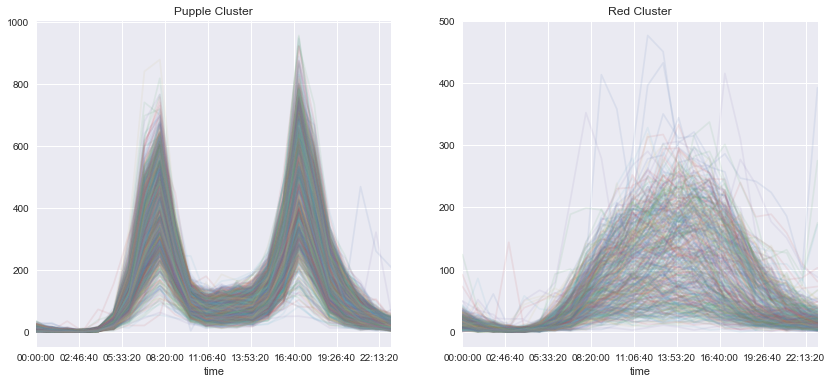

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Pupple Cluster')
ax[1].set_title('Red Cluster');

### Comparing with Days of Week

In [16]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

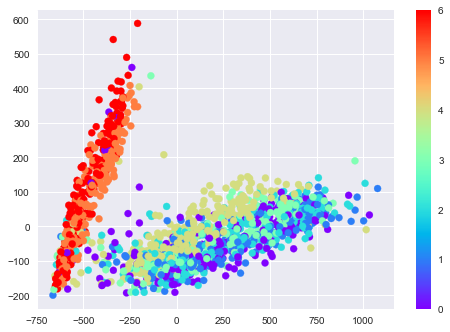

In [17]:
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliners
The following points are weekdays with a holiday-like pattern

In [18]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels==1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06'],
              dtype='datetime64[ns]', freq=None)

What's up with Feb 6, 2017? [Snow Storm](http://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)